In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cropdataset (1).csv')
df_2 = pd.read_csv('cropdataset (1).csv')

In [3]:
df.head()

,DYear,Rainfall,Region,Area,Lattitude,Longitude,Humidity,Min_Temperature,Max_Temperature,Min_Ph,...,Sowing,Others,Investment,Yield,MarketPrice,TotalValue,Profit,Seeds,PerAcre,TTMarket
0,2010,993.0,Mysore,T Narasipura,12.2110,76.9038,80-90%,26,34,6.2,...,10219.0,3564.0,13783.0,14.7,5604.0,82378.8,68595.8,80-100 Kilograms,6,3
1,2010,958.0,Mysore,Nanjangud,12.1160,76.6782,80-90%,26,34,6.2,...,10272.0,3678.0,13950.0,14.5,6019.0,87275.5,73325.5,80-100 Kilograms,5,3
2,2010,1150.0,Mysore,Hunsur,12.3091,76.2833,80-90%,26,34,6.2,...,9506.0,3513.0,13019.0,13.1,6027.0,78953.7,65934.7,80-100 Kilograms,6,2
3,2010,1269.0,Mysore,K R Nagara,12.4400,76.3811,80-90%,26,34,6.2,...,10455.0,3567.0,14022.0,13.4,5281.0,70765.4,56743.4,80-100 Kilograms,4,2
4,2010,1117.0,Mysore,T Narasipura,12.2110,76.9038,80-90%,26,34,6.2,...,9341.0,3772.0,13113.0,14.6,6084.0,88826.4,75713.4,80-100 Kilograms,6,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6131 entries, 0 to 6130
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYear            6131 non-null   int64  
 1   Rainfall         6131 non-null   float64
 2   Region           6131 non-null   object 
 3   Area             6131 non-null   object 
 4   Lattitude        6131 non-null   float64
 5   Longitude        6131 non-null   float64
 6   Humidity         6131 non-null   object 
 7   Min_Temperature  6131 non-null   int64  
 8   Max_Temperature  6131 non-null   int64  
 9   Min_Ph           6131 non-null   float64
 10  Max_Ph           6131 non-null   float64
 11  Fertilizer       6131 non-null   object 
 12  Crop             6131 non-null   object 
 13  Month            6131 non-null   object 
 14  Sowing           6131 non-null   float64
 15  Others           6131 non-null   float64
 16  Investment       6131 non-null   float64
 17  Yield         

In [5]:
df.nunique()
# how many unique values we have in each column

DYear                20
Rainfall           1121
Region               29
Area                202
Lattitude            23
Longitude           383
Humidity              5
Min_Temperature       7
Max_Temperature       8
Min_Ph                5
Max_Ph                3
Fertilizer          173
Crop                 31
Month                 5
Sowing             3598
Others             2993
Investment         1175
Yield               735
MarketPrice         978
TotalValue         3292
Profit             3794
Seeds                 4
PerAcre               4
TTMarket              2
dtype: int64

In [6]:
sum(df.duplicated())
# out of 6131 rows, 364 are duplicated 

364

In [7]:
# deleting those duplicated rows
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(5767, 24)

In [9]:
df.isnull().sum()
# No null values

DYear              0
Rainfall           0
Region             0
Area               0
Lattitude          0
Longitude          0
Humidity           0
Min_Temperature    0
Max_Temperature    0
Min_Ph             0
Max_Ph             0
Fertilizer         0
Crop               0
Month              0
Sowing             0
Others             0
Investment         0
Yield              0
MarketPrice        0
TotalValue         0
Profit             0
Seeds              0
PerAcre            0
TTMarket           0
dtype: int64

In [10]:
# just looking at the attributes 
df.iloc[0]

DYear                                                           2010
Rainfall                                                       993.0
Region                                                        Mysore
Area                                                    T Narasipura
Lattitude                                                     12.211
Longitude                                                    76.9038
Humidity                                                      80-90%
Min_Temperature                                                   26
Max_Temperature                                                   34
Min_Ph                                                           6.2
Max_Ph                                                           7.3
Fertilizer         200g of urea 200g of rock phosphate and 230 g ...
Crop                                                       Groundnut
Month                                                           June
Sowing                            

In [11]:
categoricals = list(df.select_dtypes(['object']).columns) 
categoricals

['Region', 'Area', 'Humidity', 'Fertilizer', 'Crop', 'Month', 'Seeds']

In [12]:
# by observing the data set we can say that the columns DYear, PerAcre, TTMarket are also categorical variables
for each in ['DYear','PerAcre','TTMarket']:
    categoricals.append(each)
categoricals

['Region',
 'Area',
 'Humidity',
 'Fertilizer',
 'Crop',
 'Month',
 'Seeds',
 'DYear',
 'PerAcre',
 'TTMarket']

In [13]:
# looking at the each categorical attribute
for each in categoricals:
    print('for', each, 'column - ') 
    print(df[each].value_counts()) 
    print('--------------------------')
    
## We have 29 regions, 202 areas, 31 crops and data related to 20 years i.e., from 2000 - 2019

for Region column - 
Mysore             1106
Belgaum             401
Koppa               400
Bijapur             361
Bidar               323
Bagalkot            266
Mandya              266
Kolar               213
Haveri              206
Davanagere          187
Karkala             183
Kodagu              180
Mangalore           173
DakshinaKannada     172
Kalasa              169
Uttar Kannada       167
Chamrajnagar        154
Ramanagara          138
Chikmagalur         120
Hassan              100
Chitradurga          97
Raichur              57
Gulbarga             57
Dharwad              57
Belgaum              57
Tumkur               40
Shivmogga            40
Davangere            40
Udupi                37
Name: Region, dtype: int64
--------------------------
for Area column - 
Nanjangud       238
Hunsur          238
K R Nagara      200
T Narasipura    200
Sringeri        100
               ... 
Avalenahalli      5
Attikatte         5
Arasuru           5
Gubbi             5
Kanajar   

### Observing categorical columns

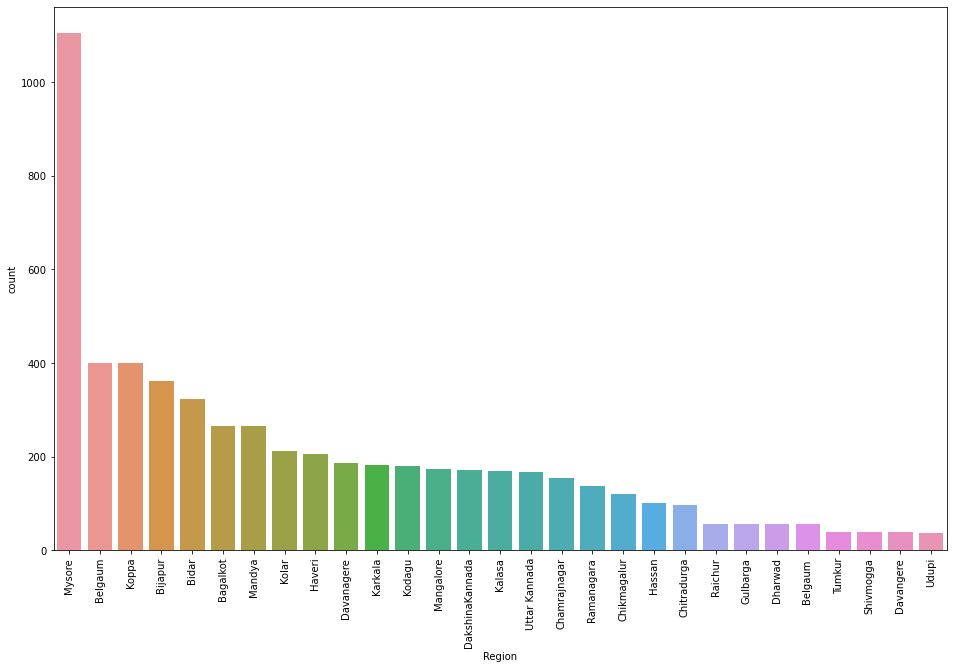

In [14]:
# for 'Region' column
plt.figure(figsize = (16,10))
sns.countplot(data = df, x = df['Region'], order = df['Region'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

## we have more number of records from mysore region and around 10 regions have more than 200 records

In [15]:
## For 'Area' column we have 202 categories out of total 5676 records - so this column doesn't make much sense

In [16]:
# For 'Humidity' column
df['Humidity'].value_counts().index
## we will transform the values of this column into integers

Index(['45-55%', '95%', '50-65%', '80-90%', '56%'], dtype='object')

In [17]:
def fn(x):
    if len(x[:-1].split('-')) == 2:
        return ((int(x[:-1].split('-')[0]) + int(x[:-1].split('-')[1])) / 2)
    else:
        return int(x[:-1])

In [18]:
df['Humidity'] = df['Humidity'].apply(lambda x : fn(x))

In [19]:
df['Humidity'].value_counts().index
# we can observe that all the values have been changed

Float64Index([50.0, 95.0, 57.5, 85.0, 56.0], dtype='float64')

In [20]:
df.iloc[1]

DYear                                                           2010
Rainfall                                                       958.0
Region                                                        Mysore
Area                                                       Nanjangud
Lattitude                                                     12.116
Longitude                                                    76.6782
Humidity                                                        85.0
Min_Temperature                                                   26
Max_Temperature                                                   34
Min_Ph                                                           6.2
Max_Ph                                                           7.3
Fertilizer         200g of urea 200g of rock phosphate and 230 g ...
Crop                                                       Groundnut
Month                                                           June
Sowing                            

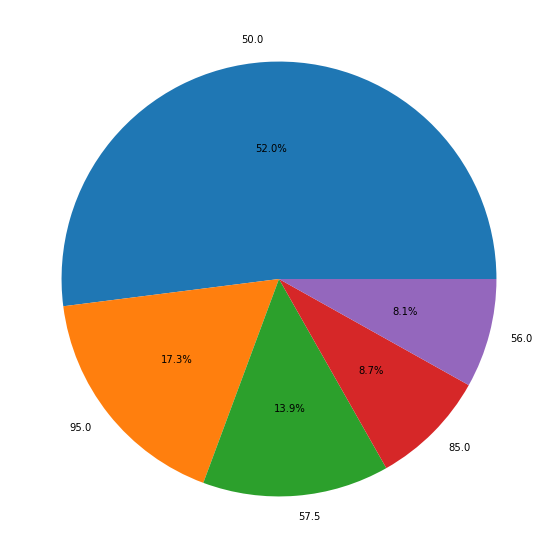

In [21]:
# plotting for 'Humidity' column
plt.figure(figsize = (16,10))
plt.pie(df['Humidity'].value_counts().values, labels = df['Humidity'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [22]:
# In 'Crop' column there are repaeated values like'Sugarcane' and 'sugarcane' 
# so, we will convert all the values to lowercase
df['Crop'] = df['Crop'].str.lower()
df['Crop'].value_counts().index

Index(['sugarcane', 'groundnut', 'cotton', 'paddy', 'jowar', 'coffee',
       'arecanut', 'pepper', 'coconut', 'mulberry', 'pulses', 'ginger', 'tea',
       'chilly', 'redgram', 'sunflower', 'horsegram', 'sesamum', 'rice',
       'jackfruit', 'maize', 'cashew', 'potato', 'ragi', 'castor', 'turdal'],
      dtype='object')

In [23]:
len(df['Crop'].value_counts())
# we only have data related to 26 crops

26

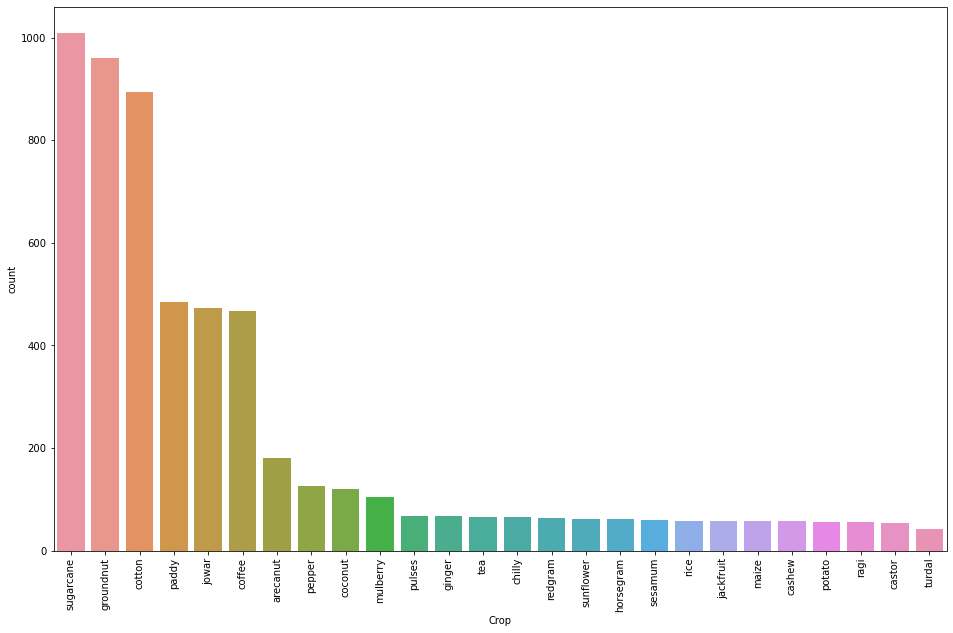

In [24]:
# for 'Crop' column
plt.figure(figsize = (16,10))
sns.countplot(data = df, x = df['Crop'], order = df['Crop'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

## we can do more analysis on the first 7 crops as we have sufficient data with sugarcane being occurred the most

In [25]:
# For 'Month' column
df['Month'].value_counts()
# we have data related to 5 months and almost all of them occurring in equal proportions

October      1253
September    1167
August       1130
June         1110
July         1107
Name: Month, dtype: int64

In [26]:
df['Seeds'].value_counts().index
# we will remove the kilograms and also if its 8-12 we will transform it to the average i.e., 10

Index(['8-12 Kilograms', '7-10 Kilograms', '6-15 Kilograms',
       '80-100 Kilograms'],
      dtype='object')

In [27]:
df['Seeds'] = df['Seeds'].apply(lambda x : x.split()[0])

In [28]:
df['Seeds'] = df['Seeds'].apply(lambda x : (int(x.split('-')[0]) + int(x.split('-')[1])) / 2 )

In [29]:
df['Seeds'].value_counts().index

Float64Index([10.0, 8.5, 10.5, 90.0], dtype='float64')

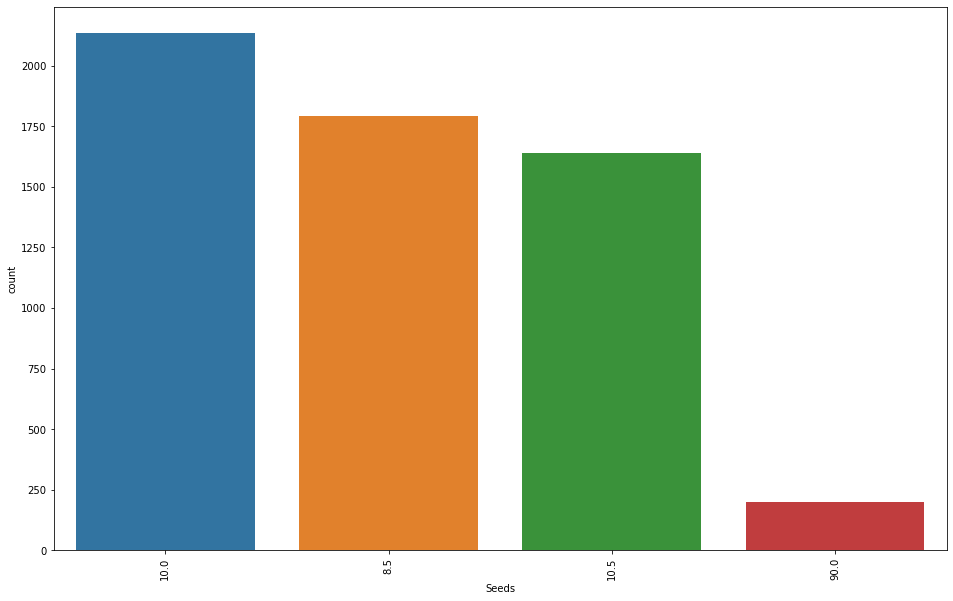

In [30]:
# for 'Seeds' column
plt.figure(figsize = (16,10))
sns.countplot(data = df, x = df['Seeds'], order = df['Seeds'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

### Observing Numerical Columns

In [31]:
numericals = [x for x in df.columns if x not in categoricals] 
numericals

['Rainfall',
 'Lattitude',
 'Longitude',
 'Min_Temperature',
 'Max_Temperature',
 'Min_Ph',
 'Max_Ph',
 'Sowing',
 'Others',
 'Investment',
 'Yield',
 'MarketPrice',
 'TotalValue',
 'Profit']

In [32]:
# we will calculate the average of the two temparatures columns and name it as avg_temp, do the same for ph
df['Avg_Temp'] = (df['Min_Temperature'] + df['Max_Temperature']) / 2

df['Avg_Ph'] = (df['Min_Ph'] + df['Max_Ph']) / 2

In [33]:
df.columns

Index(['DYear', 'Rainfall', 'Region', 'Area', 'Lattitude', 'Longitude',
       'Humidity', 'Min_Temperature', 'Max_Temperature', 'Min_Ph', 'Max_Ph',
       'Fertilizer', 'Crop', 'Month', 'Sowing', 'Others', 'Investment',
       'Yield', 'MarketPrice', 'TotalValue', 'Profit', 'Seeds', 'PerAcre',
       'TTMarket', 'Avg_Temp', 'Avg_Ph'],
      dtype='object')

In [34]:
# dropping all the unnecessary columns 
df.drop(['Min_Temperature','Max_Temperature','Min_Ph','Max_Ph','Area','Sowing','Others'], axis = 1, inplace = True)

In [35]:
new_numericals = [x for x in df.columns if x not in categoricals]
new_numericals

['Rainfall',
 'Lattitude',
 'Longitude',
 'Investment',
 'Yield',
 'MarketPrice',
 'TotalValue',
 'Profit',
 'Avg_Temp',
 'Avg_Ph']

In [36]:
df[new_numericals].corr()

,Rainfall,Lattitude,Longitude,Investment,Yield,MarketPrice,TotalValue,Profit,Avg_Temp,Avg_Ph
Rainfall,1.000000,0.050467,-0.190884,-0.020231,-0.045457,-0.014060,0.418065,-0.007376,-0.147673,-0.007582
Lattitude,0.050467,1.000000,-0.179787,-0.538287,0.500382,0.179643,-0.087001,-0.294062,0.136994,0.199325
Longitude,-0.190884,-0.179787,1.000000,0.263766,-0.260309,-0.079566,0.067142,0.147000,0.015965,-0.042637
Investment,-0.020231,-0.538287,0.263766,1.000000,-0.860201,-0.011285,0.328854,0.629055,-0.018147,-0.233650
Yield,-0.045457,0.500382,-0.260309,-0.860201,1.000000,0.305174,-0.310477,-0.444824,0.202656,0.235607
MarketPrice,-0.014060,0.179643,-0.079566,-0.011285,0.305174,1.000000,0.327083,0.493654,0.228377,0.093036
TotalValue,0.418065,-0.087001,0.067142,0.328854,-0.310477,0.327083,1.000000,0.518503,-0.134087,-0.027072
Profit,-0.007376,-0.294062,0.147000,0.629055,-0.444824,0.493654,0.518503,1.000000,-0.105809,-0.116317
Avg_Temp,-0.147673,0.136994,0.015965,-0.018147,0.202656,0.228377,-0.134087,-0.105809,1.000000,0.091118
Avg_Ph,-0.007582,0.199325,-0.042637,-0.233650,0.235607,0.093036,-0.027072,-0.116317,0.091118,1.000000


In [37]:
df[new_numericals].describe()

,Rainfall,Lattitude,Longitude,Investment,Yield,MarketPrice,TotalValue,Profit,Avg_Temp,Avg_Ph
count,5767.000000,5767.000000,5767.000000,5767.000000,5767.000000,5767.000000,5767.000000,5767.000000,5767.000000,5767.000000
mean,1065.453598,14.482072,75.964156,2783.358383,703.838657,3127.892502,35678.720164,26576.518446,27.930987,6.918510
std,418.177724,1.933815,1.026606,2933.644103,376.095721,796.873559,19224.511038,10240.615535,1.873193,0.368634
min,450.000000,11.926100,74.497700,1200.000000,10.100000,1191.771456,1264.000000,3930.500000,19.500000,6.250000
25%,764.000000,12.521800,74.996200,1328.500000,645.000000,2832.000000,28197.000000,22315.821300,28.000000,6.500000
50%,955.000000,14.464400,75.899900,1462.000000,834.000000,3135.000000,29981.000000,24301.900000,28.000000,7.000000
75%,1189.000000,16.169100,76.895100,1582.000000,979.000000,3510.000000,31376.000000,27248.620000,28.000000,7.000000
max,2400.000000,17.910400,78.129100,14260.000000,1100.000000,6115.000000,94994.000000,77051.000000,30.500000,7.500000


In [38]:
df_2 = df.copy()

In [39]:
for each in new_numericals:
    print(each, np.abs(df[each].skew()))
# If skewness of a column greater than 0.5 - we need to consider dealing the outliers of those columns

Rainfall 1.2875627627494284
Lattitude 0.19359464105533844
Longitude 0.12063743820200816
Investment 2.1563159131333447
Yield 1.065635636483882
MarketPrice 0.48549855612515086
TotalValue 1.912515507323129
Profit 2.3958130979282846
Avg_Temp 1.818473656501908
Avg_Ph 0.41463751317359526


In [40]:
outlier_columns = ['Rainfall', 'Investment', 'Yield', 'TotalValue', 'Profit', 'Avg_Temp']

In [41]:
x = df[outlier_columns].copy()

In [42]:
x = np.log(x)

In [43]:
for each in x.columns:
    print(each, np.abs(x[each].skew()))
# we can see that TotalValue, Profit columns were reduced from outliers

Rainfall 0.5647213889895059
Investment 1.5194171844489617
Yield 1.4035991058333515
TotalValue 0.38332844720312315
Profit 0.38608513270657
Avg_Temp 2.0868513477983526


In [44]:
df[outlier_columns] = x

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/si

<AxesSubplot:xlabel='Rainfall'>

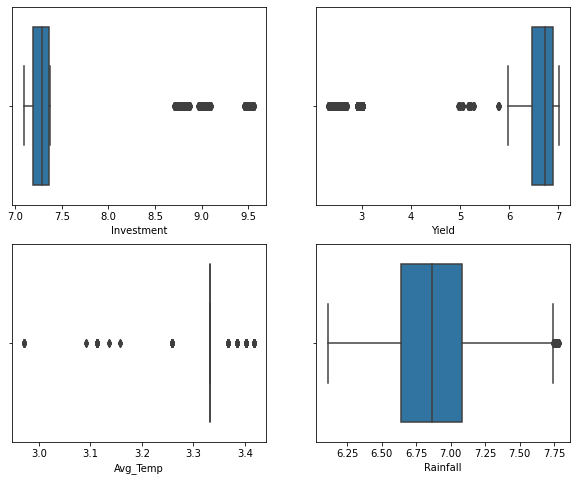

In [45]:
# we need to manage Investment, Yield, Avg_Temp, RainFall columns
fig, axs=plt.subplots (2,2, figsize= (10, 8))
sns.boxplot(df['Investment'], ax=axs [0,0]) 
sns.boxplot(df['Yield'], ax=axs [0,1])
sns.boxplot(df['Avg_Temp'], ax=axs [1,0])
sns.boxplot(df['Rainfall'], ax=axs [1,1])

In [46]:
# Investment and Yield are having outliers on one side and we will just see if they are in any way related
df[['Investment','Yield']].corr()

## these two columns are highly inversely correlated and a correlation of 0.9 means we can delete one column
## but for now, we will delete the Yield column - we still have Profit column which we can use inplace of 'Yield'

,Investment,Yield
Investment,1.000000,-0.977489
Yield,-0.977489,1.000000


In [47]:
df.drop('Yield', axis = 1, inplace = True)

In [48]:
outliers = ['Investment', 'Avg_Temp', 'Rainfall']
from sklearn.preprocessing import PowerTransformer
p = PowerTransformer (method = 'box-cox')
df[outliers] = p.fit_transform(df[outliers])

In [49]:
df[outliers].skew()
# we can see that there are no more outliers in our data set

Investment    0.000000
Avg_Temp      0.046464
Rainfall      0.038135
dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

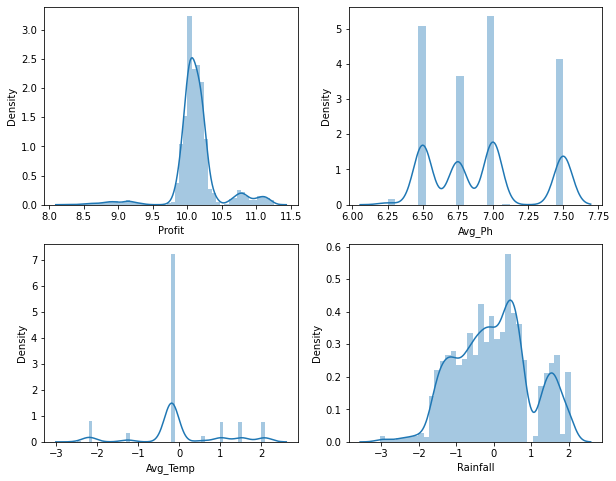

In [50]:
# Looking at some of the distributions of numerical columns
fig, axs=plt.subplots (2,2, figsize= (10, 8))
sns.distplot(df['Profit'], ax=axs [0,0]) 
sns.distplot(df['Avg_Ph'], ax=axs [0,1])
sns.distplot(df['Avg_Temp'], ax=axs [1,0])
sns.distplot(df['Rainfall'], ax=axs [1,1])

In [51]:
print(df['Avg_Ph'].nunique())
print(df['Avg_Temp'].nunique())
## From the above distribution plots we can see that Profit and Rainfall somewhat resembles normal distribution
## Avg_Ph and Avg_Temp columns are having 6 and 11 unique values -  so, No problem even if the curve isn't normal

6
11


## Checking for relations among data attributes

In [52]:
# Lookig at which crop is getting the best profits - we will create a new column profit per acre
df['Profit_per_acre'] = df['Profit'] / df['PerAcre']

In [53]:
# Which crop has best profits?
df.groupby('Crop').mean()['Profit_per_acre']
# we can see almost all the crops are getting profits in the same range in our data

Crop
arecanut     2.469010
cashew       2.473690
castor       2.531497
chilly       2.377042
coconut      2.448707
coffee       2.382952
cotton       2.367494
ginger       2.424128
groundnut    2.412493
horsegram    2.318405
jackfruit    2.327254
jowar        2.406253
maize        2.370618
mulberry     2.314568
paddy        2.358467
pepper       2.502151
potato       2.497211
pulses       2.450690
ragi         2.521250
redgram      2.439294
rice         2.414153
sesamum      2.302398
sugarcane    2.365602
sunflower    2.525959
tea          2.454410
turdal       2.353289
Name: Profit_per_acre, dtype: float64

<AxesSubplot:ylabel='Density'>

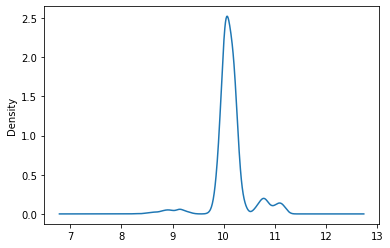

In [54]:
df['Profit'].plot.density()

<AxesSubplot:>

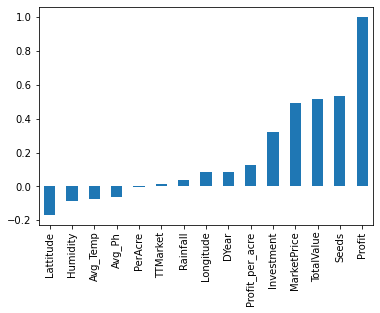

In [55]:
# which attributes are mostly related to our targer column - 'Profit'?
df.corr()['Profit'].sort_values().plot(kind = 'bar')

## TTmarket and PerAcre have negligible affect on the target label - we will delete them before creating our model
## Before deleting PerAcre make sure that - columns 'Seeds', 'TotalValue', 'Investment' are divided by that

### year - wise Comparisions

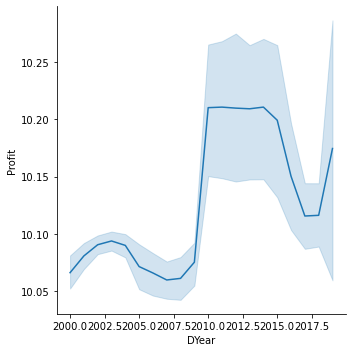

In [56]:
# Year wise relation of the total profit
sns.relplot(data = df, x = 'DYear', y = 'Profit', kind = 'line')

# More profits in the years 2008 - 2016 compared to the rest

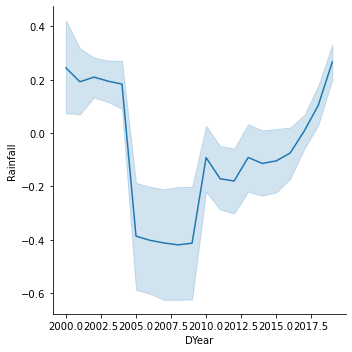

In [57]:
# Year wise observation of RainFall
sns.relplot(data = df, x = 'DYear', y = 'Rainfall', kind = 'line')

#rainfall was very less in 2005 - 2007 period in which time there were less profits and more rainfall -> better profit
#(by comparing with above graph)

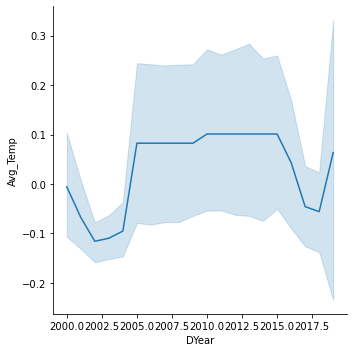

In [58]:
# Year wise observation of Avg_Temp
sns.relplot(data = df, x = 'DYear', y = 'Avg_Temp', kind = 'line')

## Temperature gradually increased from 2002 - 2016 and then decreased a bit again

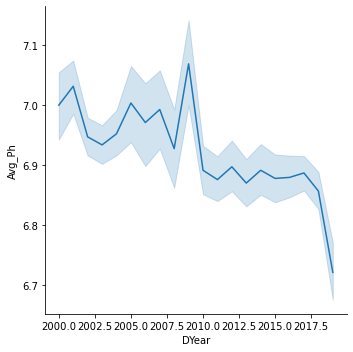

In [59]:
# Year wise observation of Avg_Ph
sns.relplot(data = df, x = 'DYear', y = 'Avg_Ph', kind = 'line')

## Avergae ph value mostly decreased continuously and from comparing the graph which has the correlations with the 
## target label 'Profit' we can say that Ph doesn't impact that much on the final outcome of the crop

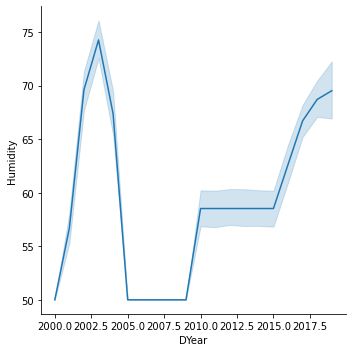

In [60]:
# Year wise observation of humidity values
sns.relplot(data = df, x = 'DYear', y = 'Humidity', kind = 'line')

## This somewhat resembles with 'Humidity' graph - we can say that rainfall and humidity are related

## Crop wise observations
#### As these are having 25+ categories each - its better to observe by values only rather than plotting and also as all the crops are more or less getting the same profits we will directly look at the other attributes related to crops

In [61]:
df.groupby('Crop').mean()['Avg_Temp'].sort_values()

## turdal and maize require similar temperatures for flourishing
## crops from groundnut to cashew are produced well in similar temperatures
## Ginger and Tea are almost same, arecanut and pepper are also same
## Jowar requires highest temperature

Crop
turdal      -2.296230
maize       -2.182161
groundnut   -0.322593
coffee      -0.190751
castor      -0.182286
sunflower   -0.182286
sugarcane   -0.182286
sesamum     -0.182286
rice        -0.182286
redgram     -0.182286
ragi        -0.182286
pulses      -0.182286
potato      -0.182286
mulberry    -0.182286
jackfruit   -0.182286
horsegram   -0.182286
cotton      -0.182286
coconut     -0.182286
chilly      -0.182286
cashew      -0.182286
paddy        0.020223
arecanut     0.350885
pepper       0.593233
ginger       1.276152
tea          1.279894
jowar        1.737234
Name: Avg_Temp, dtype: float64

In [62]:
df.groupby('Crop').mean()['Humidity'].sort_values()

# There are slightly more crops which require 70+ humidity - more humidity - better production

Crop
maize        50.000000
cotton       50.000000
coffee       51.076017
sugarcane    52.970268
paddy        55.829897
cashew       56.000000
ragi         56.000000
arecanut     56.546961
jowar        56.959746
turdal       57.500000
ginger       57.500000
tea          57.500000
pepper       70.376984
groundnut    73.244792
mulberry     78.875000
rice         85.000000
coconut      86.583333
jackfruit    88.103448
horsegram    95.000000
pulses       95.000000
chilly       95.000000
redgram      95.000000
sesamum      95.000000
castor       95.000000
sunflower    95.000000
potato       95.000000
Name: Humidity, dtype: float64

In [63]:
df.groupby('Crop').mean()['Rainfall'].sort_values()

## These are standaridized values - most of the values of rainfall are positive 
## Most of the crops grow well in high amounts of rainfall - more rainfall - better for most of the crops

Crop
jowar       -0.894017
cotton      -0.647838
sugarcane   -0.561498
sesamum      0.062224
castor       0.081004
potato       0.085520
mulberry     0.088973
jackfruit    0.100987
coconut      0.166836
cashew       0.170030
tea          0.181650
ginger       0.202402
groundnut    0.205192
ragi         0.206337
chilly       0.217173
pepper       0.220599
arecanut     0.223512
pulses       0.229303
rice         0.233338
turdal       0.261657
horsegram    0.284852
sunflower    0.318026
redgram      0.319868
maize        0.398889
paddy        1.122132
coffee       1.131369
Name: Rainfall, dtype: float64

## Region wise observations

In [64]:
# Which region is seeing better profits?
df.groupby('Region').mean()['Profit_per_acre']

## Almost all of the regions are more or less having similar amounts of profits
### koppa- highest
### Udipi - lowest

Region
Bagalkot           2.407418
Belgaum            2.364806
Belgaum            2.370618
Bidar              2.411430
Bijapur            2.352527
Chamrajnagar       2.342578
Chikmagalur        2.411060
Chitradurga        2.412446
DakshinaKannada    2.459607
Davanagere         2.427947
Davangere          2.443831
Dharwad            2.408512
Gulbarga           2.352212
Hassan             2.394755
Haveri             2.408516
Kalasa             2.375559
Karkala            2.391470
Kodagu             2.307265
Kolar              2.351691
Koppa              2.485807
Mandya             2.394730
Mangalore          2.468710
Mysore             2.381978
Raichur            2.405722
Ramanagara         2.424166
Shivmogga          2.288839
Tumkur             2.408024
Udupi              2.195744
Uttar Kannada      2.408502
Name: Profit_per_acre, dtype: float64

In [65]:
# seeing climatic conditions for highest profited region
df[df['Region'] == 'Koppa' ].describe()[['Rainfall','Humidity','Avg_Temp','Avg_Ph']]

,Rainfall,Humidity,Avg_Temp,Avg_Ph
count,400.000000,400.0,400.000000,400.00
mean,0.213509,57.5,1.279894,6.75
std,0.421717,0.0,0.251069,0.00
min,-0.572025,57.5,1.029139,6.75
25%,-0.161584,57.5,1.029139,6.75
50%,0.265741,57.5,1.279894,6.75
75%,0.574452,57.5,1.530650,6.75
max,0.830507,57.5,1.530650,6.75


In [66]:
# seeing climatic conditions for lowest profited region
df[df['Region'] == 'Udupi'].describe()[['Rainfall','Humidity','Avg_Temp','Avg_Ph']]

,Rainfall,Humidity,Avg_Temp,Avg_Ph
count,37.000000,37.0,3.700000e+01,37.000000
mean,1.456871,50.0,-1.822858e-01,7.027027
std,0.161615,0.0,8.441529e-17,0.407328
min,1.194396,50.0,-1.822858e-01,6.500000
25%,1.335119,50.0,-1.822858e-01,6.500000
50%,1.448842,50.0,-1.822858e-01,7.000000
75%,1.588626,50.0,-1.822858e-01,7.500000
max,1.721703,50.0,-1.822858e-01,7.500000


In [67]:
df.groupby('Region').mean()['Avg_Temp'].sort_values()

## Most of the regions having lower tempertaures - on the whole we can say areas in karnataka are a bit cooler 
## and most of the 25 cropsin our data set do suit those conditions

Region
Belgaum           -2.182161
Kodagu            -1.257627
Mysore            -0.384347
Bagalkot          -0.182286
Tumkur            -0.182286
Shivmogga         -0.182286
Ramanagara        -0.182286
Mangalore         -0.182286
Mandya            -0.182286
Kolar             -0.182286
Karkala           -0.182286
Kalasa            -0.182286
Udupi             -0.182286
Uttar Kannada     -0.182286
Davangere         -0.182286
Davanagere        -0.182286
DakshinaKannada   -0.182286
Chamrajnagar      -0.182286
Hassan            -0.182286
Haveri            -0.182286
Belgaum            0.140483
Bijapur            0.176247
Bidar              0.218428
Chikmagalur        0.579307
Chitradurga        1.152049
Koppa              1.279894
Gulbarga           2.088424
Dharwad            2.088424
Raichur            2.088424
Name: Avg_Temp, dtype: float64

In [68]:
df.groupby('Region').mean()['Humidity'].sort_values()

## Most of the regions are having lesser humidity values - only 6 regions have 85+ humidity

Region
Bagalkot           50.000000
Raichur            50.000000
Udupi              50.000000
Hassan             50.000000
Gulbarga           50.000000
Dharwad            50.000000
Davangere          50.000000
Shivmogga          50.000000
Tumkur             50.000000
Chitradurga        50.000000
Chikmagalur        50.000000
Chamrajnagar       50.000000
Bijapur            50.000000
Bidar              50.000000
Belgaum            50.000000
Belgaum            50.000000
Mandya             50.000000
Kodagu             50.000000
Uttar Kannada      56.000000
DakshinaKannada    56.000000
Koppa              57.500000
Ramanagara         58.543478
Mysore             67.179024
Mangalore          85.000000
Kolar              86.549296
Karkala            88.060109
Kalasa             95.000000
Davanagere         95.000000
Haveri             95.000000
Name: Humidity, dtype: float64

In [69]:
df.groupby('Region').mean()['Rainfall'].sort_values()

## Most of the regions are having higher rainfall and there is an average distribution of rainfall across regions

Region
Raichur           -1.497694
Bijapur           -1.311601
Mandya            -1.102384
Bagalkot          -1.096258
Bidar             -1.081796
Gulbarga          -0.886192
Chamrajnagar      -0.455754
Chitradurga       -0.395276
Hassan            -0.373669
Dharwad           -0.362749
Mysore            -0.041427
Kalasa             0.083089
Karkala            0.112520
Ramanagara         0.130766
DakshinaKannada    0.188328
Mangalore          0.209357
Koppa              0.213509
Uttar Kannada      0.221746
Haveri             0.224134
Davanagere         0.307648
Kolar              0.355687
Belgaum            0.398889
Belgaum            1.306771
Udupi              1.456871
Davangere          1.461997
Shivmogga          1.503049
Tumkur             1.532044
Chikmagalur        1.635065
Kodagu             1.978234
Name: Rainfall, dtype: float64

### Looking at the investment and the Total value columns

<AxesSubplot:ylabel='Density'>

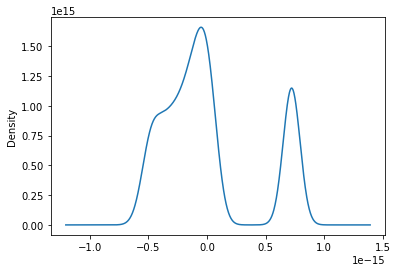

In [70]:
df['Investment'].plot.density()
## Only some of the crops require more amount of money 

<AxesSubplot:ylabel='Density'>

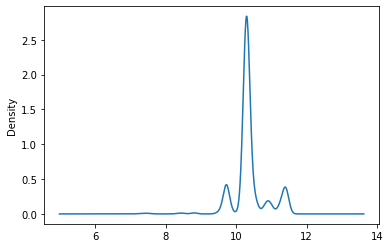

In [71]:
df['TotalValue'].plot.density()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lattitude', ylabel='Longitude'>

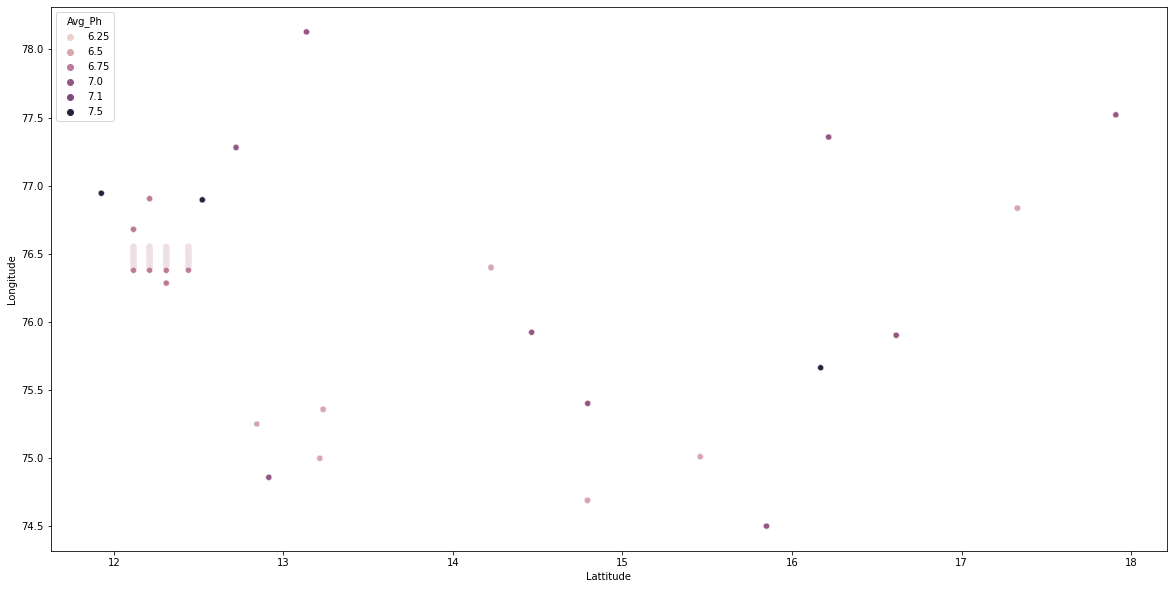

In [72]:
plt.figure(figsize = (20,10))
sns.scatterplot(df['Lattitude'], df['Longitude'], hue = df['Avg_Ph'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lattitude', ylabel='Longitude'>

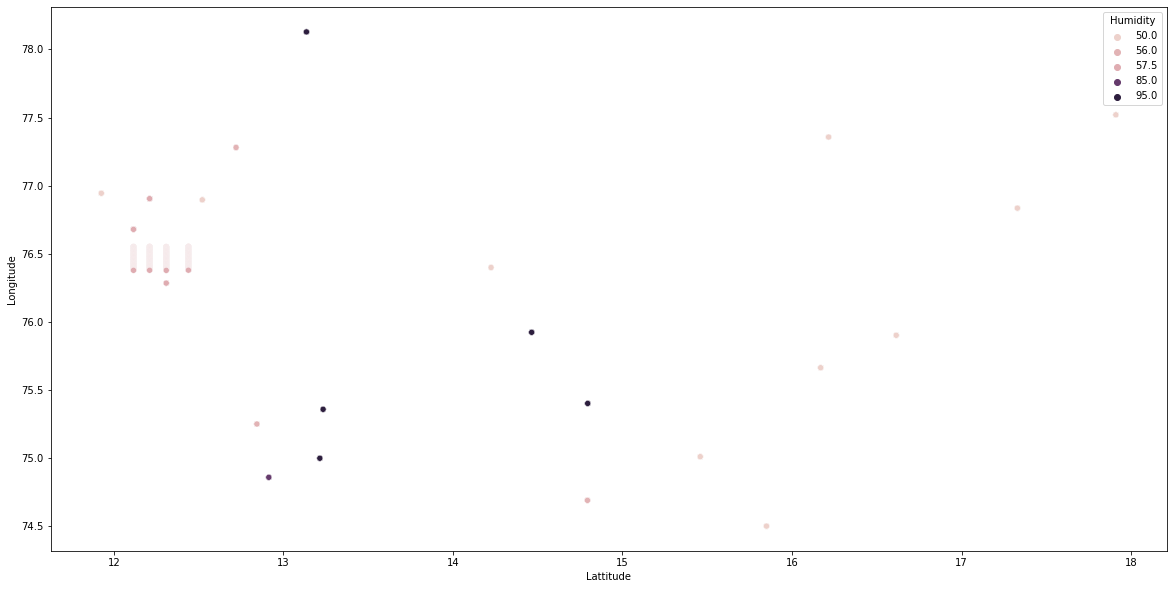

In [73]:
plt.figure(figsize = (20,10))
sns.scatterplot(df['Lattitude'], df['Longitude'], hue = df['Humidity'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lattitude', ylabel='Longitude'>

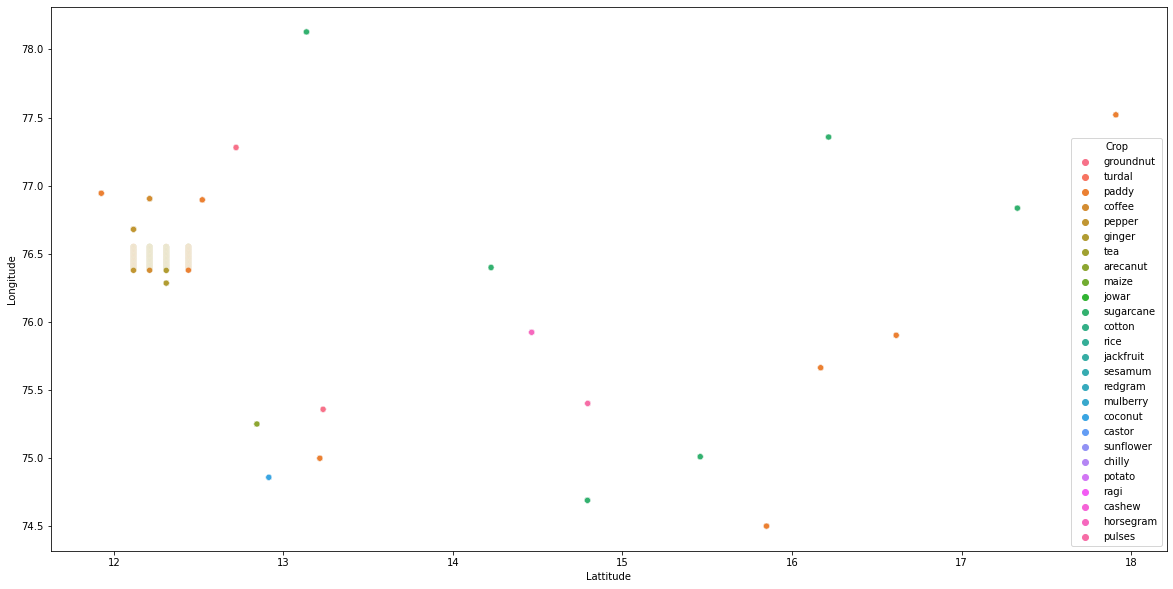

In [74]:
plt.figure(figsize = (20,10))
sns.scatterplot(df['Lattitude'], df['Longitude'], hue = df['Crop'])

In [75]:
## Nothing much intuitive by using the lattitude and longitude columns

In [76]:
z = df_2.groupby('Crop').mean()[['Rainfall','Humidity']].sort_values(by = 'Rainfall', ascending = False)[:6]
z['count'] = df_2['Crop'].value_counts()[z.index].values
z

,Rainfall,Humidity,count
Crop,,,
coffee,1705.126338,51.076017,467
paddy,1558.886598,55.829897,485
maize,1104.700000,50.000000,57
sunflower,1086.161290,95.000000,62
redgram,1085.492063,95.000000,63
horsegram,1073.693548,95.000000,62


<AxesSubplot:xlabel='Rainfall', ylabel='Humidity'>

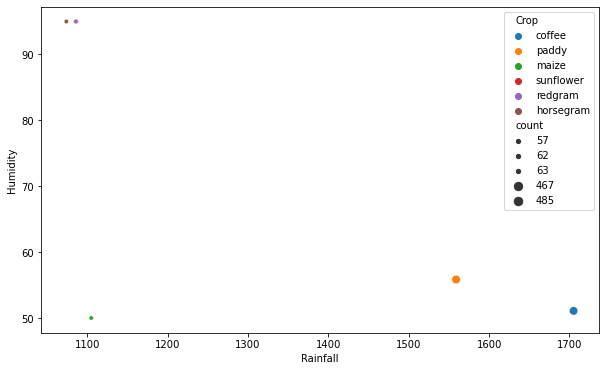

In [77]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = z, x = z['Rainfall'], y = z['Humidity'],hue = z.index, size = z['count'])

In [78]:
z_2 = df_2.groupby('Crop').mean()[['Avg_Temp','Avg_Ph']].sort_values(by = 'Avg_Temp', ascending = False)[:6]
z_2['count'] = df_2['Crop'].value_counts()[z_2.index].values
z_2

,Avg_Temp,Avg_Ph,count
Crop,,,
jowar,30.113347,6.956568,472
tea,29.750000,6.750000,66
ginger,29.746269,6.750000,67
pepper,28.928571,6.839286,126
arecanut,28.638122,6.779006,181
paddy,28.242268,6.925258,485


<AxesSubplot:xlabel='Avg_Temp', ylabel='Avg_Ph'>

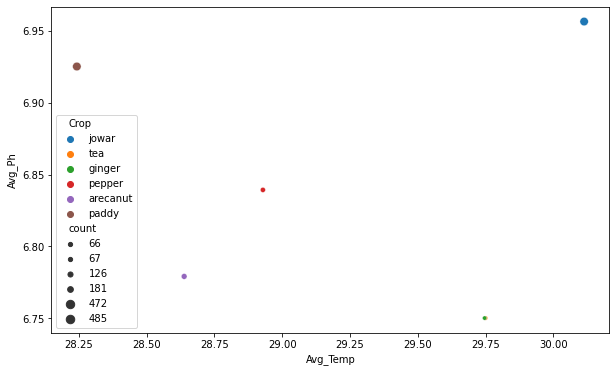

In [79]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = z_2, x = z_2['Avg_Temp'], y = z_2['Avg_Ph'],hue = z_2.index, size = z_2['count'])

In [80]:
z_3 = df_2.groupby('Region').mean()[['Rainfall','Humidity']].sort_values(by = 'Rainfall', ascending = False)[:6]
z_3['count'] = df_2['Region'].value_counts()[z_3.index].values
z_3

,Rainfall,Humidity,count
Region,,,
Kodagu,2298.077778,50.0,180
Chikmagalur,1898.708333,50.0,120
Tumkur,1803.550000,50.0,40
Shivmogga,1777.800000,50.0,40
Davangere,1742.200000,50.0,40
Udupi,1736.081081,50.0,37


<AxesSubplot:xlabel='Rainfall', ylabel='Humidity'>

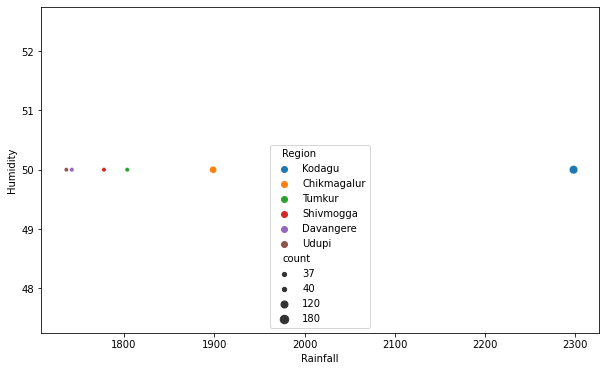

In [81]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = z_3, x = z_3['Rainfall'], y = z_3['Humidity'],hue = z_3.index, size = z_3['count'])

In [82]:
z_4 = df_2.groupby('Region').mean()[['Avg_Temp','Avg_Ph']].sort_values(by = 'Avg_Temp', ascending = False)[:6]
z_4['count'] = df_2['Region'].value_counts()[z_4.index].values
z_4

,Avg_Temp,Avg_Ph,count
Region,,,
Dharwad,30.500000,7.026316,57
Gulbarga,30.500000,6.903509,57
Raichur,30.500000,6.947368,57
Koppa,29.750000,6.750000,400
Chitradurga,29.469072,6.969072,97
Chikmagalur,29.000000,7.008333,120


<AxesSubplot:xlabel='Avg_Temp', ylabel='Avg_Ph'>

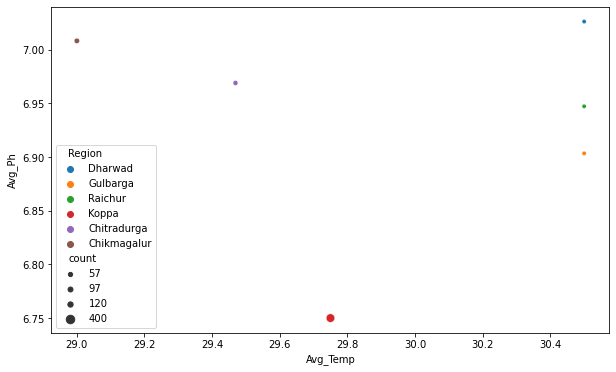

In [83]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = z_4, x = z_4['Avg_Temp'], y = z_4['Avg_Ph'],hue = z_4.index, size = z_4['count'])

In [84]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [85]:
X_train = df[['Rainfall', 'Humidity', 'Avg_Temp', 'Avg_Ph']]
y_train = df['Profit_per_acre']

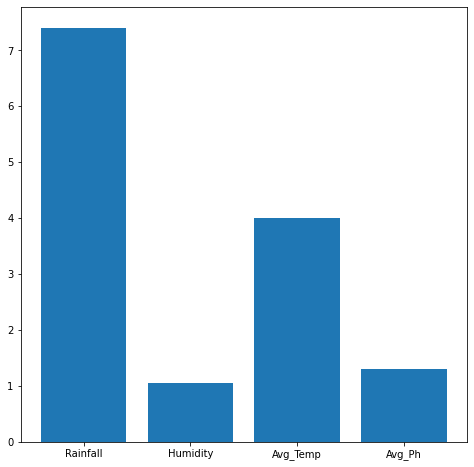

In [86]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
feature_names=X_train.columns
plt.rcParams["figure.figsize"] = (8,8)
pyplot.bar([i for i in X_train.columns], fs.scores_)
pyplot.show()

In [87]:
df.iloc[0]

DYear                                                           2010
Rainfall                                                    0.112304
Region                                                        Mysore
Lattitude                                                     12.211
Longitude                                                    76.9038
Humidity                                                        85.0
Fertilizer         200g of urea 200g of rock phosphate and 230 g ...
Crop                                                       groundnut
Month                                                           June
Investment                                                       0.0
MarketPrice                                                   5604.0
TotalValue                                                 11.319083
Profit                                                     11.135987
Seeds                                                           90.0
PerAcre                           

In [88]:
dummies = pd.get_dummies(df['Month'], drop_first = True)
df = pd.concat([df.drop('Month', axis = 1), dummies], axis = 1)

In [89]:
df4 = df.copy()

In [90]:
dummies = pd.get_dummies(df['Region'], drop_first = True)
df = pd.concat([df.drop('Region', axis = 1), dummies], axis = 1)

In [91]:
dummies = pd.get_dummies(df['Humidity'], drop_first = True)
df = pd.concat([df.drop('Humidity', axis = 1), dummies], axis = 1)

In [92]:
df.drop(['DYear','Lattitude', 'Longitude','Fertilizer','MarketPrice', 'TotalValue', 'Profit', 'Seeds',
        'PerAcre', 'TTMarket'], axis = 1, inplace = True)

In [93]:
df.columns

Index([       'Rainfall',            'Crop',      'Investment',
              'Avg_Temp',          'Avg_Ph', 'Profit_per_acre',
                  'July',            'June',         'October',
             'September',         'Belgaum',        'Belgaum ',
                 'Bidar',         'Bijapur',    'Chamrajnagar',
           'Chikmagalur',     'Chitradurga', 'DakshinaKannada',
            'Davanagere',       'Davangere',         'Dharwad',
              'Gulbarga',          'Hassan',          'Haveri',
                'Kalasa',         'Karkala',          'Kodagu',
                 'Kolar',           'Koppa',          'Mandya',
             'Mangalore',          'Mysore',         'Raichur',
            'Ramanagara',       'Shivmogga',          'Tumkur',
                 'Udupi',   'Uttar Kannada',              56.0,
                    57.5,              85.0,              95.0],
      dtype='object')

In [94]:
df3 = df.copy()

In [95]:
df4 = df.copy()

In [96]:
dummies = pd.get_dummies(df3['Crop'], drop_first = True)
df3 = pd.concat([df3.drop('Crop', axis = 1), dummies], axis = 1)

In [97]:
kharif = ['maize','cotton','rice','tea','sesamum','coffee','paddy', 'jowar','turdal','groundnut','ginger',
         'redgram','chilly','arecanut','jackfruit','coconut','castor','ragi','horsegram','sunflower']
rabi = ['potato','pepper','cashew','mulberry']
zaid = ['sugarcane','pulses']

In [98]:
def crop_fn(x):
    if x in kharif:
        return 'kharif'
    elif x in rabi:
        return 'rabi'
    else:
        return 'zaid'

In [99]:
df['Crop'] = df['Crop'].apply(lambda x : crop_fn(x))

In [100]:
df['Crop'].value_counts()

kharif    4348
zaid      1076
rabi       343
Name: Crop, dtype: int64

In [101]:
df.columns

Index([       'Rainfall',            'Crop',      'Investment',
              'Avg_Temp',          'Avg_Ph', 'Profit_per_acre',
                  'July',            'June',         'October',
             'September',         'Belgaum',        'Belgaum ',
                 'Bidar',         'Bijapur',    'Chamrajnagar',
           'Chikmagalur',     'Chitradurga', 'DakshinaKannada',
            'Davanagere',       'Davangere',         'Dharwad',
              'Gulbarga',          'Hassan',          'Haveri',
                'Kalasa',         'Karkala',          'Kodagu',
                 'Kolar',           'Koppa',          'Mandya',
             'Mangalore',          'Mysore',         'Raichur',
            'Ramanagara',       'Shivmogga',          'Tumkur',
                 'Udupi',   'Uttar Kannada',              56.0,
                    57.5,              85.0,              95.0],
      dtype='object')

In [143]:
df5 = df.copy()

In [146]:
 from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])

In [163]:
df.columns

Index([       'Rainfall',            'Crop',      'Investment',
              'Avg_Temp',          'Avg_Ph', 'Profit_per_acre',
                  'July',            'June',         'October',
             'September',         'Belgaum',        'Belgaum ',
                 'Bidar',         'Bijapur',    'Chamrajnagar',
           'Chikmagalur',     'Chitradurga', 'DakshinaKannada',
            'Davanagere',       'Davangere',         'Dharwad',
              'Gulbarga',          'Hassan',          'Haveri',
                'Kalasa',         'Karkala',          'Kodagu',
                 'Kolar',           'Koppa',          'Mandya',
             'Mangalore',          'Mysore',         'Raichur',
            'Ramanagara',       'Shivmogga',          'Tumkur',
                 'Udupi',   'Uttar Kannada',              56.0,
                    57.5,              85.0,              95.0],
      dtype='object')

In [168]:
X_clsf = df[['Rainfall','Avg_Temp','Avg_Ph','Profit_per_acre','Belgaum','Belgaum ', 'Bidar', 'Bijapur', 'Chamrajnagar', 'Chikmagalur',
            'Chitradurga', 'DakshinaKannada', 'Davanagere', 'Davangere', 'Dharwad',
           'Gulbarga', 'Hassan', 'Haveri', 'Kalasa', 'Karkala', 'Kodagu', 'Kolar','Koppa', 'Mandya', 'Mangalore', 
             'Mysore', 'Raichur', 'Ramanagara','Shivmogga', 'Tumkur', 'Udupi', 'Uttar Kannada']]
y_clsf = df['Crop']

In [103]:
X_reg = df3[['Rainfall','Avg_Temp','Avg_Ph','July', 'June', 'October', 'September', 
             'Belgaum','Belgaum ', 'Bidar', 'Bijapur', 'Chamrajnagar', 'Chikmagalur',
            'Chitradurga', 'DakshinaKannada', 'Davanagere', 'Davangere', 'Dharwad',
           'Gulbarga', 'Hassan', 'Haveri', 'Kalasa', 'Karkala', 'Kodagu', 'Kolar','Koppa', 'Mandya', 'Mangalore', 
             'Mysore', 'Raichur', 'Ramanagara','Shivmogga', 'Tumkur', 'Udupi', 'Uttar Kannada','cashew', 'castor',
       'chilly', 'coconut', 'coffee', 'cotton', 'ginger', 'groundnut',
       'horsegram', 'jackfruit', 'jowar', 'maize', 'mulberry', 'paddy',
       'pepper', 'potato', 'pulses', 'ragi', 'redgram', 'rice', 'sesamum',
       'sugarcane', 'sunflower', 'tea', 'turdal',56.0,57.5,85.0,95.0]]
y_reg = df3['Profit_per_acre']

In [169]:
from sklearn.model_selection import train_test_split
X_train_clsf, X_test_clsf, y_train_clsf, y_test_clsf = train_test_split(X_clsf, y_clsf, test_size=0.20)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.20)

In [170]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier().fit(X_train_clsf, y_train_clsf)
y_pred_clsf = grad.predict(X_test_clsf)

In [171]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_clsf, y_pred_clsf)) 
print(classification_report(y_test_clsf, y_pred_clsf))

[[801   4  78]
 [ 49  20   0]
 [120  11  71]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.86       883
           1       0.57      0.29      0.38        69
           2       0.48      0.35      0.40       202

    accuracy                           0.77      1154
   macro avg       0.62      0.52      0.55      1154
weighted avg       0.75      0.77      0.76      1154



In [107]:
from sklearn.linear_model import Ridge
rid = Ridge() 
rid.fit(X_train_reg, y_train_reg)
rid_pred = rid.predict(X_test_reg)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [108]:
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_test_reg, rid_pred)))

0.6352015007841084
